# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

Torch Requirements:
Mac

`brew install readline xz`

Ubuntu

`sudo apt-get install liblzma-dev`

Centos

`yum install -y xz-devel`

### Necessary Imports

In [530]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
import os

### Download The Dataset & Define The Transforms

In [531]:
### Run this cell

from torchvision import datasets
from torchvision.transforms import v2

# Define a transform to normalize the data
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,)),
])

# Download and load the training data
trainset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('data/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [532]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


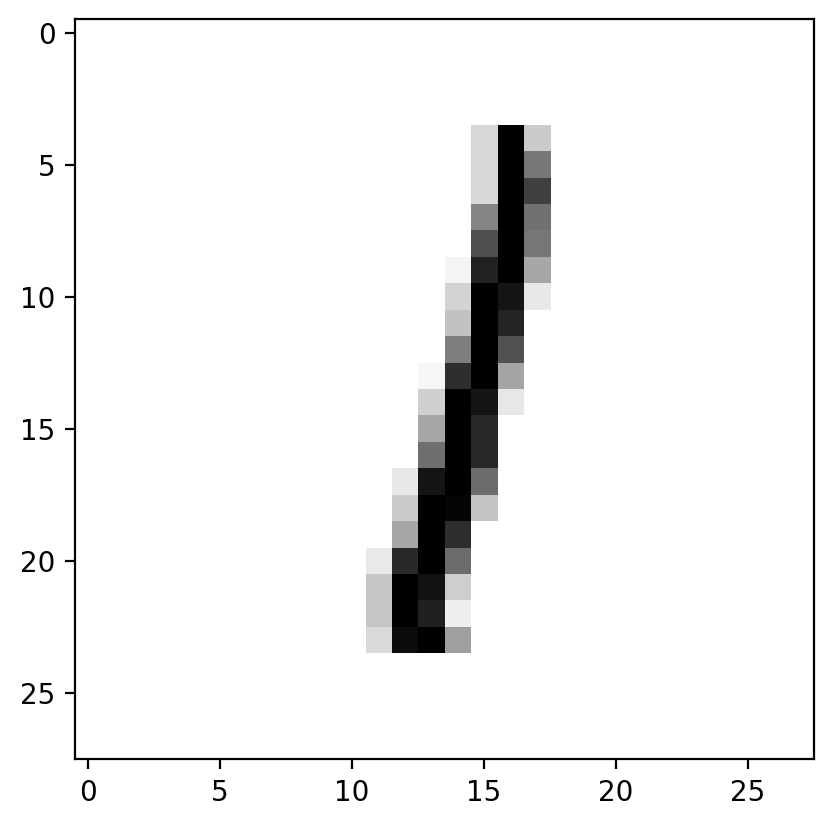

In [533]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

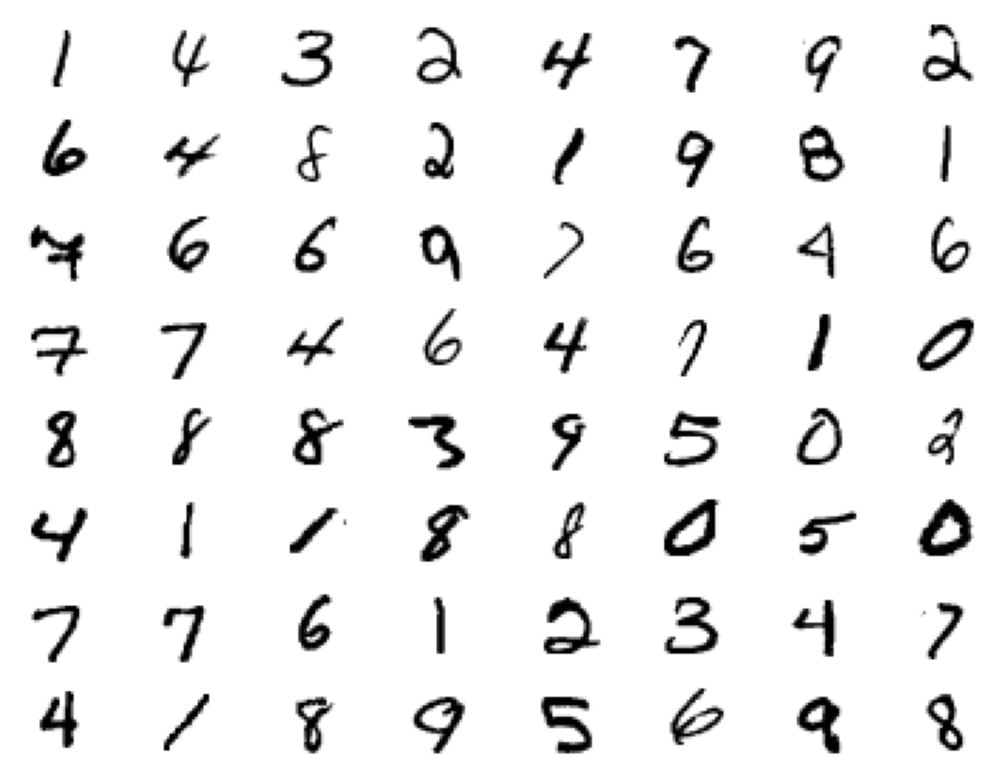

In [534]:
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(8, 8, index+1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [535]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [32, 16] 
output_size = 2

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=2, bias=True)
  (5): LogSoftmax(dim=1)
)


In [536]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
labels = labels % 2
labels = labels.long()
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [537]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022]])


In [538]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.5)

In [539]:
# 印出第一層初始權重
print('Initial weights - ', model[0].weight)

# 取一批圖片
images, labels = next(iter(trainloader))
labels = labels % 2        # 轉為單/雙分類
labels = labels.long()     # NLLLoss 要求 LongTensor

# 攤平成向量
images = images.view(images.shape[0], -1)

# 清除舊梯度
optimizer.zero_grad()

# 前向傳播 → 計算損失 → 反向傳播
output = model(images)
loss = criterion(output, labels)
loss.backward()

# 印出第一層權重的梯度（代表 AI 如何修正）
print('Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[ 0.0043,  0.0244, -0.0282,  ...,  0.0106,  0.0160, -0.0206],
        [ 0.0226,  0.0246,  0.0125,  ...,  0.0343,  0.0354,  0.0137],
        [-0.0178, -0.0242, -0.0339,  ..., -0.0241,  0.0269, -0.0195],
        ...,
        [ 0.0266,  0.0013,  0.0269,  ..., -0.0197, -0.0271, -0.0002],
        [-0.0016, -0.0235,  0.0030,  ..., -0.0027, -0.0284,  0.0292],
        [-0.0101, -0.0199, -0.0167,  ...,  0.0252, -0.0057, -0.0164]],
       requires_grad=True)
Gradient - tensor([[ 7.5470e-06,  7.5470e-06,  7.5470e-06,  ...,  7.5470e-06,
          7.5470e-06,  7.5470e-06],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.2533e-03, -1.2533e-03, -1.2533e-03,  ..., -1.2533e-03,
         -1.2533e-03, -1.2533e-03],
        ...,
        [-1.3025e-03, -1.3025e-03, -1.3025e-03,  ..., -1.3025e-03,
         -1.3025e-03, -1.3025e-03],
        [ 4.1109e-03,  4.1109e-03,  4.1109e-03,  ...,  4.1109e

In [540]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 4.3241e-03,  2.4397e-02, -2.8232e-02,  ...,  1.0598e-02,
          1.5984e-02, -2.0595e-02],
        [ 2.2650e-02,  2.4581e-02,  1.2544e-02,  ...,  3.4279e-02,
          3.5396e-02,  1.3685e-02],
        [-1.7663e-02, -2.4102e-02, -3.3849e-02,  ..., -2.4047e-02,
          2.7000e-02, -1.9445e-02],
        ...,
        [ 2.6690e-02,  1.3552e-03,  2.6980e-02,  ..., -1.9564e-02,
         -2.6967e-02, -7.3714e-05],
        [-1.8696e-03, -2.3761e-02,  2.7097e-03,  ..., -2.9469e-03,
         -2.8713e-02,  2.8897e-02],
        [-1.0285e-02, -2.0034e-02, -1.6809e-02,  ...,  2.5066e-02,
         -5.8597e-03, -1.6551e-02]], requires_grad=True)


### Core Training Of Neural Network

In [541]:
optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        labels = labels % 2 #check 1,0
        labels = labels.long()  # 轉成整數類型，供 NLLLoss 使用

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.23499851275100384
Epoch 1 - Training loss: 0.14549096136975453
Epoch 2 - Training loss: 0.12684043950494578
Epoch 3 - Training loss: 0.11970823388924
Epoch 4 - Training loss: 0.11237936236782432
Epoch 5 - Training loss: 0.10671119215036395
Epoch 6 - Training loss: 0.09965748815779397
Epoch 7 - Training loss: 0.0966095980907133
Epoch 8 - Training loss: 0.09101511135551908
Epoch 9 - Training loss: 0.09019039031703954
Epoch 10 - Training loss: 0.09193194509178067
Epoch 11 - Training loss: 0.08942317849606958
Epoch 12 - Training loss: 0.08583323122548268
Epoch 13 - Training loss: 0.0835250764700479
Epoch 14 - Training loss: 0.08428064281089125

Training Time (in minutes) = 0.6904096325238546


In [542]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,4), ncols=2)
    ax1.imshow(img.view(28, 28).numpy(), cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(2), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(2))
    ax2.set_yticklabels(['Even', 'Odd'])
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    

Predicted Digit = 1


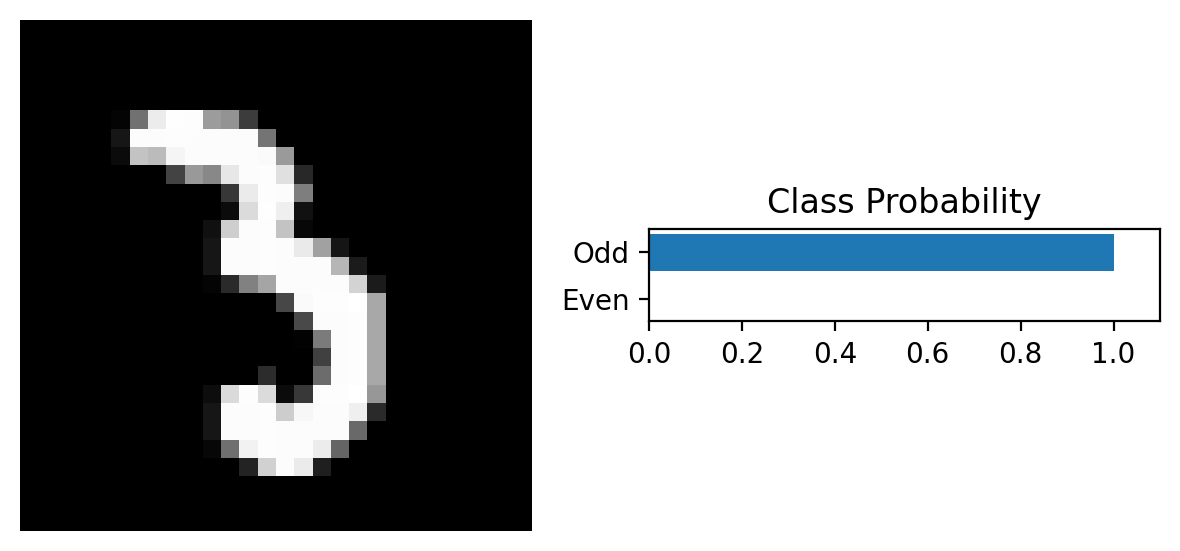

In [543]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [544]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  labels = labels % 2 #check 1,0
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9711
